<a href="https://colab.research.google.com/github/heartdbwls/Machine-Learning/blob/main/ML_project_cafe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Preparing

##라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.tree import export_graphviz
import graphviz

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

##raw 데이터 불러오기

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#csv 파일을 df로 불러오기
df = pd.read_csv('/content/drive/MyDrive/카페_train.csv')

# 데이터 확인
df

,IDX,발화자,발화문,카테고리,QA번호,QA여부,감성,인텐트,가격,수량,크기,장소,조직,사람,시간,날짜,상품명,상담번호,상담내순번
0,1,s,고객님 혹시 무슨 문제 있으신가요?,카페,5,q,m,제품_불량_질문,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9252,9
1,2,c,네 이상해요,카페,5,a,m,제품_불량_질문,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9252,10
2,3,c,빙수 위에 뿌려진 과일에서 쉰 냄새가 나는데 어떻게 하면 되죠?,카페,20591,q,n,제품_불량_질문,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,빙수|과일,20591,1
3,4,s,"죄송합니다, 폐기처분 하고 새 빙수를 제조해드리겠습니다.",카페,20591,a,m,제품_불량_질문,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,빙수,20591,2
4,5,c,마카롱 주문했는데 마카롱이 엄청 딱딱해요.,카페,66996,q,n,제품_불량_질문,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,마카롱,66996,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169628,169629,s,"죄송합니다, 모바일상품권은 사용이 어려우십니다.",카페,6799,a,m,결제_수단_확인,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6799,2
169629,169630,c,기프티콘으로 음료 계산할 수 있는 거 맞죠?,카페,10432,q,m,결제_수단_확인,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10432,1
169630,169631,s,"네, 기프티콘으로 음료 계산 가능합니다.",카페,10432,a,m,결제_수단_확인,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10432,2
169631,169632,c,후레쉬크림빵 포인트로 결제할 수 있는거죠?,카페,47312,q,m,결제_수단_확인,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,후레쉬크림빵,47312,1


##데이터 전처리

- 카테고리를 카페로 한정하므로 '카테고리' 컬럼 무의미함
- 감성을 다루지 않을 것이기에 '감성' 칼럼 삭제
- 결측률이 높은 '가격', '수량', 크기', '장소', '조직', '사람', '시간', '날짜' 삭제
- 상품명은 질문과 답변이 일치하지 않는 경우가 많으며 결측률도 꽤 높기에 삭제
- 상담내순번은 중요하지 않기에 삭제

In [4]:
#일부 컬럼만 선택하여 새로운 데이터프레임 얻음
new_df = df.loc[:, ["발화자","발화문","인텐트","상담번호","QA번호"]]
new_df

,발화자,발화문,인텐트,상담번호,QA번호
0,s,고객님 혹시 무슨 문제 있으신가요?,제품_불량_질문,9252,5
1,c,네 이상해요,제품_불량_질문,9252,5
2,c,빙수 위에 뿌려진 과일에서 쉰 냄새가 나는데 어떻게 하면 되죠?,제품_불량_질문,20591,20591
3,s,"죄송합니다, 폐기처분 하고 새 빙수를 제조해드리겠습니다.",제품_불량_질문,20591,20591
4,c,마카롱 주문했는데 마카롱이 엄청 딱딱해요.,제품_불량_질문,66996,66996
...,...,...,...,...,...
169628,s,"죄송합니다, 모바일상품권은 사용이 어려우십니다.",결제_수단_확인,6799,6799
169629,c,기프티콘으로 음료 계산할 수 있는 거 맞죠?,결제_수단_확인,10432,10432
169630,s,"네, 기프티콘으로 음료 계산 가능합니다.",결제_수단_확인,10432,10432
169631,c,후레쉬크림빵 포인트로 결제할 수 있는거죠?,결제_수단_확인,47312,47312


In [5]:
#손님용 데이터프레임 생성
df_c = new_df[new_df['발화자'] == 'c']
df_c.head()

,발화자,발화문,인텐트,상담번호,QA번호
1,c,네 이상해요,제품_불량_질문,9252,5
2,c,빙수 위에 뿌려진 과일에서 쉰 냄새가 나는데 어떻게 하면 되죠?,제품_불량_질문,20591,20591
4,c,마카롱 주문했는데 마카롱이 엄청 딱딱해요.,제품_불량_질문,66996,66996
6,c,와플 지금 받았는데 너무 눅눅해서 못먹겠어요 이거 어떻게 하면 되나요?,제품_불량_질문,20596,20596
8,c,케이크에 생크림 모양이 너무 변형된 것 같은데 어떻게 하나요?,제품_불량_질문,20586,20586


In [6]:
#직원용 데이터 프레임 생성
df_s =new_df[new_df['발화자'] == 's']
df_s.head()

,발화자,발화문,인텐트,상담번호,QA번호
0,s,고객님 혹시 무슨 문제 있으신가요?,제품_불량_질문,9252,5
3,s,"죄송합니다, 폐기처분 하고 새 빙수를 제조해드리겠습니다.",제품_불량_질문,20591,20591
5,s,죄송합니다. 마카롱 다른걸로 다시 보내드리겠습니다.,제품_불량_질문,66996,66996
7,s,"죄송합니다, 불량 제품은 폐기해주시고 와플 재배송 해드리겠습니다.",제품_불량_질문,20596,20596
9,s,"죄송합니다, 새 케이크로 포장해서 배송해드리겠습니다.",제품_불량_질문,20586,20586


In [7]:
#손님과 직원의 데이터프레임 내 '상담번호','인텐트'. 'QA번호' 컬럼 내용이 전부 일치하는 경우
#두 df을 합쳐서 새로운 데이터프레임 생성
df_c_filtered = df_c.merge(df_s, on=['상담번호', 'QA번호','인텐트'], how='inner')
df_c_filtered.head()

,발화자_x,발화문_x,인텐트,상담번호,QA번호,발화자_y,발화문_y
0,c,네 이상해요,제품_불량_질문,9252,5,s,고객님 혹시 무슨 문제 있으신가요?
1,c,빙수 위에 뿌려진 과일에서 쉰 냄새가 나는데 어떻게 하면 되죠?,제품_불량_질문,20591,20591,s,"죄송합니다, 폐기처분 하고 새 빙수를 제조해드리겠습니다."
2,c,마카롱 주문했는데 마카롱이 엄청 딱딱해요.,제품_불량_질문,66996,66996,s,죄송합니다. 마카롱 다른걸로 다시 보내드리겠습니다.
3,c,와플 지금 받았는데 너무 눅눅해서 못먹겠어요 이거 어떻게 하면 되나요?,제품_불량_질문,20596,20596,s,"죄송합니다, 불량 제품은 폐기해주시고 와플 재배송 해드리겠습니다."
4,c,케이크에 생크림 모양이 너무 변형된 것 같은데 어떻게 하나요?,제품_불량_질문,20586,20586,s,"죄송합니다, 새 케이크로 포장해서 배송해드리겠습니다."


고객이 질문하는 것에 대한 답을 제대로 하는 것이기에 직원이 고객에게 질문하는 형태의 행 삭제

In [8]:
# '?'를 포함한 행을 삭제하기 전, 복사본 생성
df_cleaned = df_c_filtered.copy()

# 발화문_y에서 '?'를 포함한 행 삭제
column_name = '발화문_y'
df_cleaned = df_cleaned[~df_cleaned[column_name].str.contains('\?')]

# '?'를 포함한 행이 삭제된 데이터프레임 확인
df_cleaned

,발화자_x,발화문_x,인텐트,상담번호,QA번호,발화자_y,발화문_y
1,c,빙수 위에 뿌려진 과일에서 쉰 냄새가 나는데 어떻게 하면 되죠?,제품_불량_질문,20591,20591,s,"죄송합니다, 폐기처분 하고 새 빙수를 제조해드리겠습니다."
2,c,마카롱 주문했는데 마카롱이 엄청 딱딱해요.,제품_불량_질문,66996,66996,s,죄송합니다. 마카롱 다른걸로 다시 보내드리겠습니다.
3,c,와플 지금 받았는데 너무 눅눅해서 못먹겠어요 이거 어떻게 하면 되나요?,제품_불량_질문,20596,20596,s,"죄송합니다, 불량 제품은 폐기해주시고 와플 재배송 해드리겠습니다."
4,c,케이크에 생크림 모양이 너무 변형된 것 같은데 어떻게 하나요?,제품_불량_질문,20586,20586,s,"죄송합니다, 새 케이크로 포장해서 배송해드리겠습니다."
5,c,시루떡에서 왜 시큼한 냄새가 나는 거죠?,제품_불량_질문,21403,21403,s,"죄송합니다, 불량 제품인제 확인 후에 다시 쪄드릴게요."
...,...,...,...,...,...,...,...
75710,c,기프티콘으로 결제 가능한 거 맞죠?,결제_수단_확인,45461,45461,s,"네, 기프티콘 결제 가능합니다."
75711,c,카카오페이로 결제 된거 맞죠?,결제_수단_확인,31251,31251,s,네 카카오페이로 결제되셨습니다.
75712,c,모바일상품권도 결제할 수 있어요?,결제_수단_확인,6799,6799,s,"죄송합니다, 모바일상품권은 사용이 어려우십니다."
75713,c,기프티콘으로 음료 계산할 수 있는 거 맞죠?,결제_수단_확인,10432,10432,s,"네, 기프티콘으로 음료 계산 가능합니다."


활용할 데이터만 담은 새로운 데이터프레임 생성
- 발화자_x, 발화자_y, 상담번호, QA번호, 인텐트 컬럼 삭제
- 컬럼명 변경
 - 발화문_x > Q
 - 발화문_y > A

In [9]:
#활용할 컬럼만 가져와 새로운 데이터 프레임 생성
fdf = df_cleaned.loc[:, ["발화문_x","발화문_y"]]

#컬럼명 알기쉽게 변경
fdf.rename(columns={'발화문_x': 'Q'}, inplace=True)
fdf.rename(columns={'발화문_y': 'A'}, inplace=True)

fdf

,Q,A
1,빙수 위에 뿌려진 과일에서 쉰 냄새가 나는데 어떻게 하면 되죠?,"죄송합니다, 폐기처분 하고 새 빙수를 제조해드리겠습니다."
2,마카롱 주문했는데 마카롱이 엄청 딱딱해요.,죄송합니다. 마카롱 다른걸로 다시 보내드리겠습니다.
3,와플 지금 받았는데 너무 눅눅해서 못먹겠어요 이거 어떻게 하면 되나요?,"죄송합니다, 불량 제품은 폐기해주시고 와플 재배송 해드리겠습니다."
4,케이크에 생크림 모양이 너무 변형된 것 같은데 어떻게 하나요?,"죄송합니다, 새 케이크로 포장해서 배송해드리겠습니다."
5,시루떡에서 왜 시큼한 냄새가 나는 거죠?,"죄송합니다, 불량 제품인제 확인 후에 다시 쪄드릴게요."
...,...,...
75710,기프티콘으로 결제 가능한 거 맞죠?,"네, 기프티콘 결제 가능합니다."
75711,카카오페이로 결제 된거 맞죠?,네 카카오페이로 결제되셨습니다.
75712,모바일상품권도 결제할 수 있어요?,"죄송합니다, 모바일상품권은 사용이 어려우십니다."
75713,기프티콘으로 음료 계산할 수 있는 거 맞죠?,"네, 기프티콘으로 음료 계산 가능합니다."


#모델 구축

##포지셔널 인코딩(Positional Encoding)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [11]:
class PositionalEncoding(tf.keras.layers.Layer):
  def __init__(self, position, d_model):
    super(PositionalEncoding, self).__init__()
    self.pos_encoding = self.positional_encoding(position, d_model)

  def get_angles(self, position, i, d_model):
    angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
    return position * angles

  def positional_encoding(self, position, d_model):
    angle_rads = self.get_angles(
        position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
        i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
        d_model=d_model)

    # 배열의 짝수 인덱스(2i)에는 사인 함수 적용
    sines = tf.math.sin(angle_rads[:, 0::2])

    # 배열의 홀수 인덱스(2i+1)에는 코사인 함수 적용
    cosines = tf.math.cos(angle_rads[:, 1::2])

    angle_rads = np.zeros(angle_rads.shape)
    angle_rads[:, 0::2] = sines
    angle_rads[:, 1::2] = cosines
    pos_encoding = tf.constant(angle_rads)
    pos_encoding = pos_encoding[tf.newaxis, ...]

    print(pos_encoding.shape)
    return tf.cast(pos_encoding, tf.float32)

  def call(self, inputs):
    return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

50*128의 크기를 가지는 포지셔널 인코딩 행렬 시각화

(1, 50, 128)


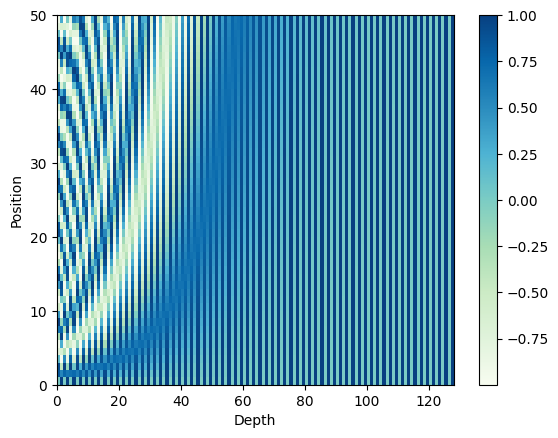

In [12]:
# 문장의 길이 50, 임베딩 벡터의 차원 128
sample_pos_encoding = PositionalEncoding(50, 128)

plt.pcolormesh(sample_pos_encoding.pos_encoding.numpy()[0], cmap='GnBu')
plt.xlabel('Depth')
plt.xlim((0, 128))
plt.ylabel('Position')
plt.colorbar()
plt.show()

##스케일드 닷-프로덕트 어텐션

In [13]:
def scaled_dot_product_attention(query, key, value, mask):
  # query 크기 : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
  # key 크기 : (batch_size, num_heads, key의 문장 길이, d_model/num_heads)
  # value 크기 : (batch_size, num_heads, value의 문장 길이, d_model/num_heads)
  # padding_mask : (batch_size, 1, 1, key의 문장 길이)

  # Q와 K의 곱. 어텐션 스코어 행렬.
  matmul_qk = tf.matmul(query, key, transpose_b=True)

  # 스케일링
  # dk의 루트값으로 나눠준다.
  depth = tf.cast(tf.shape(key)[-1], tf.float32)
  logits = matmul_qk / tf.math.sqrt(depth)

  # 마스킹. 어텐션 스코어 행렬의 마스킹 할 위치에 매우 작은 음수값을 넣는다.
  # 매우 작은 값이므로 소프트맥스 함수를 지나면 행렬의 해당 위치의 값은 0이 된다.
  if mask is not None:
    logits += (mask * -1e9)

  # 소프트맥스 함수는 마지막 차원인 key의 문장 길이 방향으로 수행된다.
  # attention weight : (batch_size, num_heads, query의 문장 길이, key의 문장 길이)
  attention_weights = tf.nn.softmax(logits, axis=-1)

  # output : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
  output = tf.matmul(attention_weights, value)

  return output, attention_weights

##멀티 헤드 어텐션

In [14]:
class MultiHeadAttention(tf.keras.layers.Layer):

  def __init__(self, d_model, num_heads, name="multi_head_attention"):
    super(MultiHeadAttention, self).__init__(name=name)
    self.num_heads = num_heads
    self.d_model = d_model

    assert d_model % self.num_heads == 0

    # d_model을 num_heads로 나눈 값.
    self.depth = d_model // self.num_heads

    # WQ, WK, WV에 해당하는 밀집층 정의
    self.query_dense = tf.keras.layers.Dense(units=d_model)
    self.key_dense = tf.keras.layers.Dense(units=d_model)
    self.value_dense = tf.keras.layers.Dense(units=d_model)

    # WO에 해당하는 밀집층 정의
    self.dense = tf.keras.layers.Dense(units=d_model)

  # num_heads 개수만큼 q, k, v를 split하는 함수
  def split_heads(self, inputs, batch_size):
    inputs = tf.reshape(
        inputs, shape=(batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(inputs, perm=[0, 2, 1, 3])

  def call(self, inputs):
    query, key, value, mask = inputs['query'], inputs['key'], inputs[
        'value'], inputs['mask']
    batch_size = tf.shape(query)[0]

    # 1. WQ, WK, WV에 해당하는 밀집층 지나기
    # q : (batch_size, query의 문장 길이, d_model)
    # k : (batch_size, key의 문장 길이, d_model)
    # v : (batch_size, value의 문장 길이, d_model)
    # 참고) 인코더(k, v)-디코더(q) 어텐션에서는 query 길이와 key, value의 길이는 다를 수 있다.
    query = self.query_dense(query)
    key = self.key_dense(key)
    value = self.value_dense(value)

    # 2. 헤드 나누기
    # q : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
    # k : (batch_size, num_heads, key의 문장 길이, d_model/num_heads)
    # v : (batch_size, num_heads, value의 문장 길이, d_model/num_heads)
    query = self.split_heads(query, batch_size)
    key = self.split_heads(key, batch_size)
    value = self.split_heads(value, batch_size)

    # 3. 스케일드 닷 프로덕트 어텐션. 앞서 구현한 함수 사용.
    # (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
    scaled_attention, _ = scaled_dot_product_attention(query, key, value, mask)
    # (batch_size, query의 문장 길이, num_heads, d_model/num_heads)
    scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

    # 4. 헤드 연결(concatenate)하기
    # (batch_size, query의 문장 길이, d_model)
    concat_attention = tf.reshape(scaled_attention,
                                  (batch_size, -1, self.d_model))

    # 5. WO에 해당하는 밀집층 지나기
    # (batch_size, query의 문장 길이, d_model)
    outputs = self.dense(concat_attention)

    return outputs

##패딩 마스트

In [15]:
def create_padding_mask(x):
  mask = tf.cast(tf.math.equal(x, 0), tf.float32)
  # (batch_size, 1, 1, key의 문장 길이)
  return mask[:, tf.newaxis, tf.newaxis, :]

##인코더 구현

In [16]:
def encoder_layer(dff, d_model, num_heads, dropout, name="encoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")

  # 인코더는 패딩 마스크 사용
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # 멀티-헤드 어텐션 (첫번째 서브층 / 셀프 어텐션)
  attention = MultiHeadAttention(
      d_model, num_heads, name="attention")({
          'query': inputs, 'key': inputs, 'value': inputs, # Q = K = V
          'mask': padding_mask # 패딩 마스크 사용
      })

  # 드롭아웃 + 잔차 연결과 층 정규화
  attention = tf.keras.layers.Dropout(rate=dropout)(attention)
  attention = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(inputs + attention)

  # 포지션 와이즈 피드 포워드 신경망 (두번째 서브층)
  outputs = tf.keras.layers.Dense(units=dff, activation='relu')(attention)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # 드롭아웃 + 잔차 연결과 층 정규화
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention + outputs)

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)

##인코더 쌓기

In [17]:
def encoder(vocab_size, num_layers, dff,
            d_model, num_heads, dropout,
            name="encoder"):
  inputs = tf.keras.Input(shape=(None,), name="inputs")

  # 인코더는 패딩 마스크 사용
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # 포지셔널 인코딩 + 드롭아웃
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))
  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)
  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  # 인코더를 num_layers개 쌓기
  for i in range(num_layers):
    outputs = encoder_layer(dff=dff, d_model=d_model, num_heads=num_heads,
        dropout=dropout, name="encoder_layer_{}".format(i),
    )([outputs, padding_mask])

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)

##디코더의 첫번째 서브층 : 셀프 어텐션과 룩 어헤드 마스크

In [18]:
# 디코더의 첫번째 서브층(sublayer)에서 미래 토큰을 Mask하는 함수
def create_look_ahead_mask(x):
  seq_len = tf.shape(x)[1]
  look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
  padding_mask = create_padding_mask(x) # 패딩 마스크도 포함
  return tf.maximum(look_ahead_mask, padding_mask)

##디코더 구현

In [19]:
def decoder_layer(dff, d_model, num_heads, dropout, name="decoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
  enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")

  # 디코더는 룩어헤드 마스크(첫번째 서브층)와 패딩 마스크(두번째 서브층) 둘 다 사용.
  look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name="look_ahead_mask")
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

  # 멀티-헤드 어텐션 (첫번째 서브층 / 마스크드 셀프 어텐션)
  attention1 = MultiHeadAttention(
      d_model, num_heads, name="attention_1")(inputs={
          'query': inputs, 'key': inputs, 'value': inputs, # Q = K = V
          'mask': look_ahead_mask # 룩어헤드 마스크
      })

  # 잔차 연결과 층 정규화
  attention1 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention1 + inputs)

  # 멀티-헤드 어텐션 (두번째 서브층 / 디코더-인코더 어텐션)
  attention2 = MultiHeadAttention(
      d_model, num_heads, name="attention_2")(inputs={
          'query': attention1, 'key': enc_outputs, 'value': enc_outputs, # Q != K = V
          'mask': padding_mask # 패딩 마스크
      })

  # 드롭아웃 + 잔차 연결과 층 정규화
  attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
  attention2 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention2 + attention1)

  # 포지션 와이즈 피드 포워드 신경망 (세번째 서브층)
  outputs = tf.keras.layers.Dense(units=dff, activation='relu')(attention2)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # 드롭아웃 + 잔차 연결과 층 정규화
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(outputs + attention2)

  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)

##디코더 쌓기

In [20]:
def decoder(vocab_size, num_layers, dff,
            d_model, num_heads, dropout,
            name='decoder'):
  inputs = tf.keras.Input(shape=(None,), name='inputs')
  enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')

  # 디코더는 룩어헤드 마스크(첫번째 서브층)와 패딩 마스크(두번째 서브층) 둘 다 사용.
  look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name='look_ahead_mask')
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

  # 포지셔널 인코딩 + 드롭아웃
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))
  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)
  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  # 디코더를 num_layers개 쌓기
  for i in range(num_layers):
    outputs = decoder_layer(dff=dff, d_model=d_model, num_heads=num_heads,
        dropout=dropout, name='decoder_layer_{}'.format(i),
    )(inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])

  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)

##트랜스포커 구현

In [21]:
def transformer(vocab_size, num_layers, dff,
                d_model, num_heads, dropout,
                name="transformer"):

  # 인코더의 입력
  inputs = tf.keras.Input(shape=(None,), name="inputs")

  # 디코더의 입력
  dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

  # 인코더의 패딩 마스크
  enc_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='enc_padding_mask')(inputs)

  # 디코더의 룩어헤드 마스크(첫번째 서브층)
  look_ahead_mask = tf.keras.layers.Lambda(
      create_look_ahead_mask, output_shape=(1, None, None),
      name='look_ahead_mask')(dec_inputs)

  # 디코더의 패딩 마스크(두번째 서브층)
  dec_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='dec_padding_mask')(inputs)

  # 인코더의 출력은 enc_outputs. 디코더로 전달된다.
  enc_outputs = encoder(vocab_size=vocab_size, num_layers=num_layers, dff=dff,
      d_model=d_model, num_heads=num_heads, dropout=dropout,
  )(inputs=[inputs, enc_padding_mask]) # 인코더의 입력은 입력 문장과 패딩 마스크

  # 디코더의 출력은 dec_outputs. 출력층으로 전달된다.
  dec_outputs = decoder(vocab_size=vocab_size, num_layers=num_layers, dff=dff,
      d_model=d_model, num_heads=num_heads, dropout=dropout,
  )(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

  # 다음 단어 예측을 위한 출력층
  outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)

  return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)

##트랜스포머 하이퍼파라미터 정하기

(1, 9000, 128)
(1, 9000, 128)


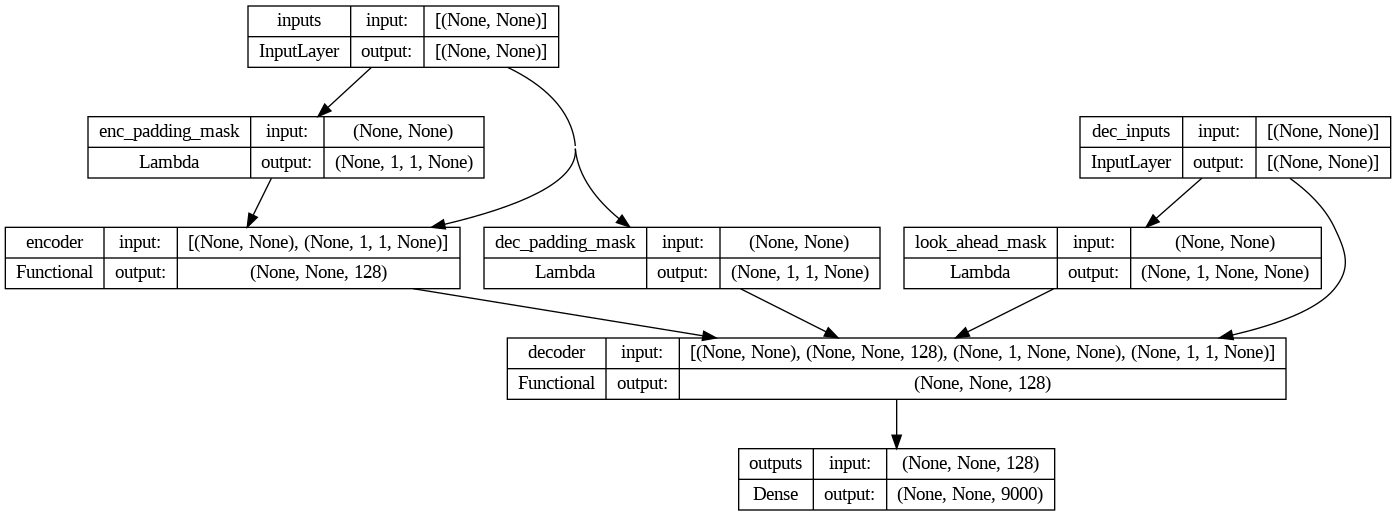

In [22]:
small_transformer = transformer(
    vocab_size = 9000,
    num_layers = 4,
    dff = 512,
    d_model = 128,
    num_heads = 4,
    dropout = 0.3,
    name="small_transformer")

tf.keras.utils.plot_model(
    small_transformer, to_file='small_transformer.png', show_shapes=True)

##손실 함수 정의

In [23]:
def loss_function(y_true, y_pred):
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))

  loss = tf.keras.losses.SparseCategoricalCrossentropy(
      from_logits=True, reduction='none')(y_true, y_pred)

  mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
  loss = tf.multiply(loss, mask)

  return tf.reduce_mean(loss)

##학습률

In [24]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

  def __init__(self, d_model, warmup_steps=4000):
    super(CustomSchedule, self).__init__()
    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)
    self.warmup_steps = warmup_steps

  def __call__(self, step):
    step=tf.cast(step,dtype=tf.float32)
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps**-1.5)

    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

학습률 변화 시각화

Text(0.5, 0, 'Train Step')

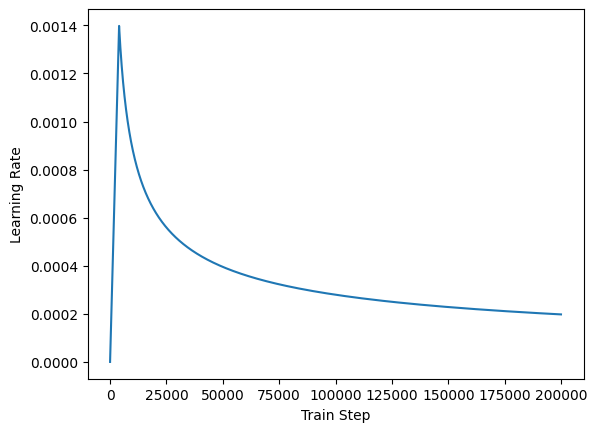

In [25]:
sample_learning_rate = CustomSchedule(d_model=128)

plt.plot(sample_learning_rate(tf.range(200000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

#챗봇 구현

###라이브러리 불러오기

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
import time
import tensorflow_datasets as tfds
import tensorflow as tf

###데이터 로드

질문(Q)과 대답(A)의 쌍으로 이루어진 데이터

In [27]:
fdf.head()

,Q,A
1,빙수 위에 뿌려진 과일에서 쉰 냄새가 나는데 어떻게 하면 되죠?,"죄송합니다, 폐기처분 하고 새 빙수를 제조해드리겠습니다."
2,마카롱 주문했는데 마카롱이 엄청 딱딱해요.,죄송합니다. 마카롱 다른걸로 다시 보내드리겠습니다.
3,와플 지금 받았는데 너무 눅눅해서 못먹겠어요 이거 어떻게 하면 되나요?,"죄송합니다, 불량 제품은 폐기해주시고 와플 재배송 해드리겠습니다."
4,케이크에 생크림 모양이 너무 변형된 것 같은데 어떻게 하나요?,"죄송합니다, 새 케이크로 포장해서 배송해드리겠습니다."
5,시루떡에서 왜 시큼한 냄새가 나는 거죠?,"죄송합니다, 불량 제품인제 확인 후에 다시 쪄드릴게요."


In [28]:
#샘플수 확인
print('챗봇 샘플의 개수 :', len(fdf))

챗봇 샘플의 개수 : 72573


In [29]:
#Null값 확인
print(fdf.isnull().sum())

Q    0
A    0
dtype: int64


구두점 처리 (?/./ !)
- 구두점 앞에 띄어쓰기를 추가하여 다른 문자들과 구분

In [30]:
questions = []
for sentence in fdf['Q']:
    # 구두점에 대해서 띄어쓰기
    # ex) 12시 땡! -> 12시 땡 !
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = sentence.strip()
    questions.append(sentence)

In [31]:
answers = []
for sentence in fdf['A']:
    # 구두점에 대해서 띄어쓰기
    # ex) 12시 땡! -> 12시 땡 !
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = sentence.strip()
    answers.append(sentence)

상위 5개를 출력해 구두점들이 띄어쓰기 형태로 잘 분리되었는지 확인

In [32]:
print(questions[:5])
print(answers[:5])

['빙수 위에 뿌려진 과일에서 쉰 냄새가 나는데 어떻게 하면 되죠 ?', '마카롱 주문했는데 마카롱이 엄청 딱딱해요 .', '와플 지금 받았는데 너무 눅눅해서 못먹겠어요 이거 어떻게 하면 되나요 ?', '케이크에 생크림 모양이 너무 변형된 것 같은데 어떻게 하나요 ?', '시루떡에서 왜 시큼한 냄새가 나는 거죠 ?']
['죄송합니다 ,  폐기처분 하고 새 빙수를 제조해드리겠습니다 .', '죄송합니다 .  마카롱 다른걸로 다시 보내드리겠습니다 .', '죄송합니다 ,  불량 제품은 폐기해주시고 와플 재배송 해드리겠습니다 .', '죄송합니다 ,  새 케이크로 포장해서 배송해드리겠습니다 .', '죄송합니다 ,  불량 제품인제 확인 후에 다시 쪄드릴게요 .']


###단어집합 생성

In [33]:
# 서브워드텍스트인코더를 사용하여 질문, 답변 데이터로부터 단어 집합(Vocabulary) 생성
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    questions + answers, target_vocab_size=2**13)

In [34]:
# 시작 토큰과 종료 토큰에 대한 정수 부여.
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]

# 시작 토큰과 종료 토큰을 고려하여 단어 집합의 크기를 + 2
VOCAB_SIZE = tokenizer.vocab_size + 2

In [35]:
print('시작 토큰 번호 :',START_TOKEN)
print('종료 토큰 번호 :',END_TOKEN)
print('단어 집합의 크기 :',VOCAB_SIZE)

시작 토큰 번호 : [8293]
종료 토큰 번호 : [8294]
단어 집합의 크기 : 8295


###정수 인코딩/패딩

- 정수 인코딩/디코딩 by sample

In [36]:
# 서브워드텍스트인코더 토크나이저의 .encode()를 사용하여 텍스트 시퀀스를 정수 시퀀스로 변환.
print('임의의 질문 샘플을 정수 인코딩 : {}'.format(tokenizer.encode(questions[0])))

임의의 질문 샘플을 정수 인코딩 : [163, 280, 7486, 724, 98, 8273, 8174, 8213, 8069, 1627, 3318, 50, 166, 219, 2]


In [37]:
# 서브워드텍스트인코더 토크나이저의 .encode()와 .decode() 테스트해보기
# 임의의 입력 문장을 sample_string에 저장
sample_string = questions[40]

# encode() : 텍스트 시퀀스 --> 정수 시퀀스
tokenized_string = tokenizer.encode(sample_string)
print ('정수 인코딩 후의 문장 {}'.format(tokenized_string))

# decode() : 정수 시퀀스 --> 텍스트 시퀀스
original_string = tokenizer.decode(tokenized_string)
print ('기존 문장: {}'.format(original_string))

정수 인코딩 후의 문장 [2547, 98, 7095, 8069, 1627, 3318, 4751, 1583, 7444, 1190, 54, 2]
기존 문장: 시루떡에서 시큼한 냄새가 나는데 완전 쉬어버린 거죠 ?


In [38]:
# 각 정수는 각 단어와 어떻게 mapping되는지 병렬로 출력
# 서브워드텍스트인코더는 의미있는 단위의 서브워드로 토크나이징한다. 띄어쓰기 단위 X 형태소 분석 단위 X
for ts in tokenized_string:
  print ('{} ----> {}'.format(ts, tokenizer.decode([ts])))

2547 ----> 시루떡
98 ----> 에서 
7095 ----> 시큼한
8069 ---->  
1627 ----> 냄새가 
3318 ----> 나는데 
4751 ----> 완전 
1583 ----> 쉬
7444 ----> 어버
1190 ----> 린 
54 ----> 거죠
2 ---->  ?


- 정수 인코딩/패딩

In [39]:
# 최대 길이를 40으로 정의
MAX_LENGTH = 40

# 토큰화 / 정수 인코딩 / 시작 토큰과 종료 토큰 추가 / 패딩
def tokenize_and_filter(inputs, outputs):
  tokenized_inputs, tokenized_outputs = [], []

  for (sentence1, sentence2) in zip(inputs, outputs):
    # encode(토큰화 + 정수 인코딩), 시작 토큰과 종료 토큰 추가
    sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
    sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN

    tokenized_inputs.append(sentence1)
    tokenized_outputs.append(sentence2)

  # 패딩
  tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
  tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_outputs, maxlen=MAX_LENGTH, padding='post')

  return tokenized_inputs, tokenized_outputs

In [40]:
questions, answers = tokenize_and_filter(questions, answers)

- 데이터 크기 확인

In [41]:
print('질문 데이터의 크기(shape) :', questions.shape)
print('답변 데이터의 크기(shape) :', answers.shape)

질문 데이터의 크기(shape) : (72573, 40)
답변 데이터의 크기(shape) : (72573, 40)


In [42]:
# 0번 샘플을 임의로 출력
print(questions[0])
print(answers[0])

[8293  163  280 7486  724   98 8273 8174 8213 8069 1627 3318   50  166
  219    2 8294    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]
[8293  147    3 4566  284 4334  602  162 1868 4262 7019  520    1 8294
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]


## 인코더와 디코더 입력/레이블 생성

In [43]:
# 텐서플로우 dataset을 이용하여 셔플(shuffle)을 수행하되, 배치 크기로 데이터를 묶는다.
# 또한 이 과정에서 교사 강요(teacher forcing)을 사용하기 위해서 디코더의 입력과 실제값 시퀀스를 구성한다.
BATCH_SIZE = 64
BUFFER_SIZE = 20000

# 디코더의 실제값 시퀀스에서는 시작 토큰을 제거해야 한다.
dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': questions,
        'dec_inputs': answers[:, :-1] # 디코더의 입력. 마지막 패딩 토큰이 제거된다.
    },
    {
        'outputs': answers[:, 1:]  # 맨 처음 토큰이 제거된다. 다시 말해 시작 토큰이 제거된다.
    },
))

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [44]:
# 임의의 샘플에 대해서 [:, :-1]과 [:, 1:]이 어떤 의미를 가지는지 테스트해본다.
print(answers[0]) # 기존 샘플
print(answers[:1][:, :-1]) # 마지막 패딩 토큰 제거하면서 길이가 39가 된다.
print(answers[:1][:, 1:]) # 맨 처음 토큰이 제거된다. 다시 말해 시작 토큰이 제거된다. 길이는 역시 39가 된다.

[8293  147    3 4566  284 4334  602  162 1868 4262 7019  520    1 8294
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]
[[8293  147    3 4566  284 4334  602  162 1868 4262 7019  520    1 8294
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]]
[[ 147    3 4566  284 4334  602  162 1868 4262 7019  520    1 8294    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]]


##트랜스포머

(1, 8295, 256)
(1, 8295, 256)


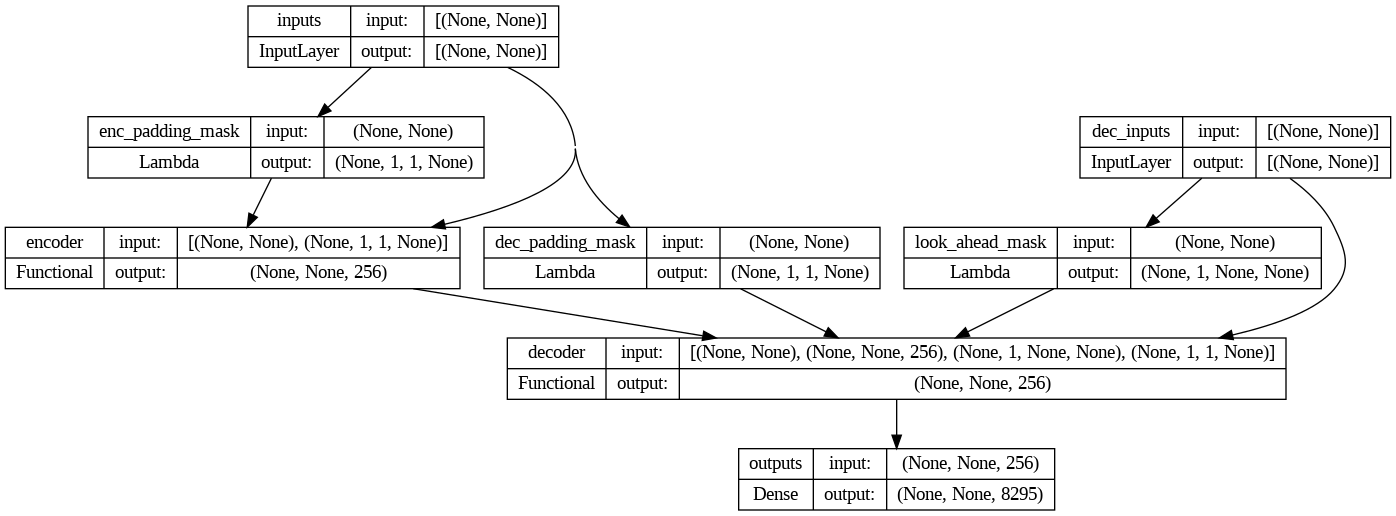

In [45]:
tf.keras.backend.clear_session()

# 하이퍼파라미터
D_MODEL = 256
NUM_LAYERS = 2
NUM_HEADS = 8
DFF = 512
DROPOUT = 0.1

model = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    dff=DFF,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT,
    name="model_transformer")

tf.keras.utils.plot_model(
    model, to_file='model_transformer.png', show_shapes=True)

- 학습률과 옵티마이저 정의
- 모델 컴파일

In [46]:
learningrate = CustomSchedule(d_model=D_MODEL)

In [47]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=learningrate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

train_accuracy=tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')

def accuracy(y_true, y_pred):
  mask=tf.math.logical_not(tf.math.equal(y_true,0))
  mask=tf.expand_dims(tf.cast(mask,dtype=y_pred.dtype), axis=-1)
  y_pred*=mask
  acc=train_accuracy(y_true,y_pred)
  return tf.reduce_mean(acc)

model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])

##훈련

In [48]:
EPOCHS = 50
model.fit(dataset, epochs=EPOCHS)

Epoch 1/50
1134/1134 [==============================] - 127s 93ms/step - loss: 1.1943 - accuracy: 0.8444
Epoch 2/50
1134/1134 [==============================] - 66s 58ms/step - loss: 0.8203 - accuracy: 0.8640
Epoch 3/50
1134/1134 [==============================] - 63s 55ms/step - loss: 0.6564 - accuracy: 0.8733
Epoch 4/50
1134/1134 [==============================] - 63s 55ms/step - loss: 0.5658 - accuracy: 0.8799
Epoch 5/50
1134/1134 [==============================] - 62s 55ms/step - loss: 0.4873 - accuracy: 0.8853
Epoch 6/50
1134/1134 [==============================] - 61s 54ms/step - loss: 0.4231 - accuracy: 0.8902
Epoch 7/50
1134/1134 [==============================] - 61s 53ms/step - loss: 0.3730 - accuracy: 0.8947
Epoch 8/50
1134/1134 [==============================] - 63s 55ms/step - loss: 0.3326 - accuracy: 0.8989
Epoch 9/50
1134/1134 [==============================] - 62s 54ms/step - loss: 0.2993 - accuracy: 0.9028
Epoch 10/50
1134/1134 [==============================] - 61s 54

# 챗봇 평가

## validation 데이터 전처리

In [49]:
vdf = pd.read_csv('/content/drive/MyDrive/카페_validation.csv')

vnew_df = vdf.loc[:, ["발화자","발화문","인텐트","상담번호","QA번호"]]

vdf_c = vnew_df[vnew_df['발화자'] == 'c']

vdf_s = vnew_df[vnew_df['발화자'] == 's']

vdf_c_filtered = vdf_c.merge(vdf_s, on=['상담번호', 'QA번호','인텐트'], how='inner')

vdf_cleaned = vdf_c_filtered.copy()

column_name = '발화문_y'
vdf_cleaned = vdf_cleaned[~vdf_cleaned[column_name].str.contains('\?')]

dfv = vdf_cleaned.loc[:, ["발화문_x","발화문_y"]]

dfv.rename(columns={'발화문_x': 'Q'}, inplace=True)
dfv.rename(columns={'발화문_y': 'A'}, inplace=True)

dfv

,Q,A
0,케이크에서 약간 시큼한 맛이 나는데 상한건가요?,"죄송합니다, 새걸로 바꿔드릴게요."
1,주스 안에서 돌 같은게 나왔는데 확인 좀 해주시겠어요?,제조과정에서 문제가 있었던 걸로 추측되네요.
2,이 에그타르트 가운데가 너무 날계란물인 것 같은데 원래 이런 거예요?,안쪽이 약간 덜 익은 제품이 나갔나봐요. 다른 걸로 드릴게요.
3,이 딸기 케이크 사이즈가 잘못 표기된 것 같은데요.,바로 확인해서 알려드리겠습니다.
4,케이크 주문했는데 생크림 상한 것 같습니다.,죄송합니다. 환불을 원하시면 바로 환불해 드릴게요.
...,...,...
9321,포인트 차감으로 프레첼 머랭 쿠키 구매할 수 있는 거죠?,"네, 포인트 차감으로 프레첼 머랭 쿠키를 구매하실 수 있습니다."
9322,지난주에 매장에서 보내준 생일 쿠폰이 있어요.,"네, 1년 안에 쿠폰 쓰시면 됩니다."
9323,카카오톡 기프티콘이랑 롯데 상품권 동시에 사용해도 되는 거죠?,"네, 기프티콘과 상품권 동시 사용 가능합니다."
9324,기프티콘 적용된 것 맞나요?,네. 잘 적용되었습니다.


## 입력된 문장 전처리

In [50]:
def preprocess_sentence(sentence):
  # 단어와 구두점 사이에 공백 추가.
  # ex) 12시 땡! -> 12시 땡 !
  sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
  sentence = sentence.strip()
  return sentence

## 트랜스포머 모델에 입력 데이터 전달 및 예측

In [51]:
def evaluate(sentence):
  # 입력 문장에 대한 전처리
  sentence = preprocess_sentence(sentence)

  # 입력 문장에 시작 토큰과 종료 토큰을 추가
  sentence = tf.expand_dims(
      START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)

  output = tf.expand_dims(START_TOKEN, 0)

  # 디코더의 예측 시작
  for i in range(MAX_LENGTH):
    predictions = model(inputs=[sentence, output], training=False)

    # 현재 시점의 예측 단어를 받아온다.
    predictions = predictions[:, -1:, :]
    predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

    # 만약 현재 시점의 예측 단어가 종료 토큰이라면 예측을 중단
    if tf.equal(predicted_id, END_TOKEN[0]):
      break

    # 현재 시점의 예측 단어를 output(출력)에 연결한다.
    # output은 for문의 다음 루프에서 디코더의 입력이 된다.
    output = tf.concat([output, predicted_id], axis=-1)

  # 단어 예측이 모두 끝났다면 output을 리턴.
  return tf.squeeze(output, axis=0)

## 정수 시퀀스를 문자열로 디코딩 후 출력

In [54]:
def predict(sentence):
  prediction = evaluate(sentence)

  # prediction == 디코더가 리턴한 챗봇의 대답에 해당하는 정수 시퀀스
  # tokenizer.decode()를 통해 정수 시퀀스를 문자열로 디코딩.
  predicted_sentence = tokenizer.decode(
      [i for i in prediction if i < tokenizer.vocab_size])
  print('Input: {}'.format(sentence))
  print('Output: {}'.format(predicted_sentence))

  return predicted_sentence

## 질문 해보기

- validation data set 활용함

In [55]:
# 새로운 열 'P'를 추가하고 초기값으로 빈 문자열을 할당
dfv['P'] = ''

#인덱싱 재설정
dfv = dfv.reset_index(drop=True)

# 'Q' 열의 레코드를 하나씩 처리하여 예측 결과를 'P' 열에 저장
for i, q in enumerate(dfv['Q']):
    q_s=str(q)
    # q를 모델의 입력으로 전달하여 예측한 결과를 p에 저장
    output = predict(q_s)  # 모델에 따라 예측 방법이 달라질 수 있습니다.

    # 'P' 열의 해당 인덱스에 예측 결과를 할당
    dfv.at[i, 'P'] = output

# 출력
dfv

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Input: 팥빙수에 연유 1회는 무료로 리필 되는 거 맞죠?
Output: 네 ,  시럽은 1회 무료 리필 비용 무료입니다 .
Input: 체리에이드 스무 잔 사무실로 가져갈거라서 빨리 포장 해주실 수 있죠?
Output: 네 ,  가져가실 수 있게 포장 해드릴게요 .
Input: 돌체라떼 두 잔 따뜻하게 테이크아웃 된다고 하셨죠?
Output: 네 ,  가능합니다 .
Input: 버터랑 딸기잼 다 먹었는데 리필할 수 있는 거 맞죠?
Output: 네 .  리필 가능합니다 .
Input: 추운 날에도 바닐라라떼 핫으로 포장이 되는 거죠?
Output: 네 ,  원하시는 만큼 제일 잘 됩니다 .
Input: 마카롱 낱개로 구매 가능한 거죠?
Output: 네 .  마카롱 낱개로 구매 가능합니다 .
Input: 초콜릿 크림 칩 프라푸치노 주문접수된것 맞나요?
Output: 네 .  초콜릿 크림 칩 프라푸치노 주문접수 확인했습니다 ,
Input: 한 30분 거리인데 티라미수빙수도 배달 되나요?
Output: 네 ,  30분 이내로 배달 가능합니다 .
Input: 아이스 바닐라라떼 일곱 잔 주문할게요.
Output: 네 ,  아이스 테이크아웃 전용 잔 준비해드리겠습니다 .
Input: 브런치 세트도 포장해주실 수 있는거죠?
Output: 네 ,  브런치 도 수 있습니다 .
Input: 그릭요거트플레인 톨 주문했는데, 그게 중간 사이즈 맞죠?
Output: 네 ,  그릭요거트플레인 톨 사이즈 하면 나안 합니다 .
Input: 바닐라라떼 핫으로 하는데 총 아홉 잔 부탁드려요.
Output: 네 ,  바닐라라떼 핫으로 총 다섯 잔 준비해드리겠습니다 .
Input: 저 소세지빵 총 2개 주문했는데 맞게 들어갔죠?
Output: 네 ,  맞습니다 .
Input: 아이스 라떼 1잔 주문 가능한 거죠?
Output: 네 .  아이스 라떼 주문 가능합니다 .
Input: 아이스아메리카노 서른 잔 주문 하겠습니다.
O

,Q,A,P
0,케이크에서 약간 시큼한 맛이 나는데 상한건가요?,"죄송합니다, 새걸로 바꿔드릴게요.","네 , 확인 후 교환 도와드리겠습니다 ."
1,주스 안에서 돌 같은게 나왔는데 확인 좀 해주시겠어요?,제조과정에서 문제가 있었던 걸로 추측되네요.,불편을 드려 죄송합니다 . 제조과정에서 문제가 있었던 것 같아요 .
2,이 에그타르트 가운데가 너무 날계란물인 것 같은데 원래 이런 거예요?,안쪽이 약간 덜 익은 제품이 나갔나봐요. 다른 걸로 드릴게요.,"이 약간 어 , 오븐 대신 전자레인지에 넣고 만듭니다 ."
3,이 딸기 케이크 사이즈가 잘못 표기된 것 같은데요.,바로 확인해서 알려드리겠습니다.,"죄송합니다 , 다른 사이즈로 다시 드릴게요 ."
4,케이크 주문했는데 생크림 상한 것 같습니다.,죄송합니다. 환불을 원하시면 바로 환불해 드릴게요.,죄송합니다 . 케이크 다른 걸로 다시 배달해 드리겠습니다 .
...,...,...,...
9294,포인트 차감으로 프레첼 머랭 쿠키 구매할 수 있는 거죠?,"네, 포인트 차감으로 프레첼 머랭 쿠키를 구매하실 수 있습니다.","네 , 포인트 차감으로 할인 가능하십니다 ."
9295,지난주에 매장에서 보내준 생일 쿠폰이 있어요.,"네, 1년 안에 쿠폰 쓰시면 됩니다.","네 , 아마 댟으로 가시면 포인트 사용해드릴게요 ."
9296,카카오톡 기프티콘이랑 롯데 상품권 동시에 사용해도 되는 거죠?,"네, 기프티콘과 상품권 동시 사용 가능합니다.","네 , 기프티콘과 상품권 같이 영업해드립니다 ."
9297,기프티콘 적용된 것 맞나요?,네. 잘 적용되었습니다.,"네 , 기프티콘 바코드로 확인되었습니다 ."


In [56]:
csv_path = '/content/drive/MyDrive/predict_output.csv'
dfv.to_csv(csv_path, index=False)